import matplotlib.pyplot as plt
import numpy as np
import sklearn
import pandas as pd
import os
# ^^^ pyforest auto-imports - don't write above this line
# Clinical Deterioration Prediction Model - Logistic Regression
$$
\renewcommand{\like}{{\cal L}}
\renewcommand{\loglike}{{\ell}}
\renewcommand{\err}{{\cal E}}
\renewcommand{\dat}{{\cal D}}
\renewcommand{\hyp}{{\cal H}}
\renewcommand{\Ex}[2]{E_{#1}[#2]}
\renewcommand{\x}{{\mathbf x}}
\renewcommand{\v}[1]{{\mathbf #1}}
$$

In [1]:
os.getcwd()

<IPython.core.display.Javascript object>

'C:\\Users\\abebu\\Dropbox\\Data Science\\Projects\\Capstone Project 1\\Potential Projects\\9. MIMIC\\Machine Learning'

In [2]:
os.chdir("C://Users/abebu/Google Drive/mimic-iii-clinical-database-1.4")

<IPython.core.display.Javascript object>

In [3]:
saps = pd.read_csv("saps_ts.csv", )
saps.head()

<IPython.core.display.Javascript object>

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,SUBJECT_ID,HADM_ID,ICUSTAY_ID,los,hdeath,death,admission,...,Sodium,Temp,Bilirubin,WBC,hr,gcs,bp,AGE,UO,saps2
0,0,0,0,268,110404,280836,3.2490,1,1,8,...,0.0,0.0,0.0,0.0,11.0,26.0,13.0,12.0,0.0,82.0
1,1,1,1,269,106296,206613,3.2788,0,0,8,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,7.0,0.0,37.0
2,2,2,2,270,188028,220345,2.8939,0,0,0,...,0.0,3.0,0.0,0.0,11.0,0.0,13.0,18.0,0.0,45.0
3,3,3,3,271,173727,249196,2.0600,0,0,8,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,24.0
4,4,4,4,272,164716,210407,1.6202,0,0,8,...,0.0,3.0,0.0,0.0,0.0,0.0,5.0,12.0,0.0,28.0


In [4]:
saps.loc[saps['UO'] <0.500, 'UO'] = 11
saps.loc[saps['UO'].between(0.500, 0.999), 'UO'] = 4
saps.loc[saps['UO']>0.999, 'UO'] = 0
saps

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,SUBJECT_ID,HADM_ID,ICUSTAY_ID,los,hdeath,death,admission,...,Sodium,Temp,Bilirubin,WBC,hr,gcs,bp,AGE,UO,saps2
0,0,0,0,268,110404,280836,3.2490,1,1,8,...,0.0,0.0,0.0,0.0,11.0,26.0,13.0,12.0,0.0,82.0
1,1,1,1,269,106296,206613,3.2788,0,0,8,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,7.0,0.0,37.0
2,2,2,2,270,188028,220345,2.8939,0,0,0,...,0.0,3.0,0.0,0.0,11.0,0.0,13.0,18.0,0.0,45.0
3,3,3,3,271,173727,249196,2.0600,0,0,8,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,24.0
4,4,4,4,272,164716,210407,1.6202,0,0,8,...,0.0,3.0,0.0,0.0,0.0,0.0,5.0,12.0,0.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61112,61112,61112,61112,94944,143774,201233,2.1894,0,0,8,...,0.0,3.0,0.0,0.0,2.0,26.0,13.0,16.0,0.0,74.0
61113,61113,61113,61113,94950,123750,283653,2.4942,0,0,8,...,0.0,3.0,0.0,0.0,2.0,5.0,0.0,18.0,0.0,36.0
61114,61114,61114,61114,94953,196881,241585,0.9259,0,1,0,...,0.0,3.0,0.0,0.0,0.0,7.0,5.0,7.0,0.0,28.0
61115,61115,61115,61115,94954,118475,202802,2.3346,0,0,0,...,0.0,3.0,0.0,0.0,0.0,26.0,13.0,12.0,0.0,60.0


In [5]:
saps

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,SUBJECT_ID,HADM_ID,ICUSTAY_ID,los,hdeath,death,admission,...,Sodium,Temp,Bilirubin,WBC,hr,gcs,bp,AGE,UO,saps2
0,0,0,0,268,110404,280836,3.2490,1,1,8,...,0.0,0.0,0.0,0.0,11.0,26.0,13.0,12.0,0.0,82.0
1,1,1,1,269,106296,206613,3.2788,0,0,8,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,7.0,0.0,37.0
2,2,2,2,270,188028,220345,2.8939,0,0,0,...,0.0,3.0,0.0,0.0,11.0,0.0,13.0,18.0,0.0,45.0
3,3,3,3,271,173727,249196,2.0600,0,0,8,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,24.0
4,4,4,4,272,164716,210407,1.6202,0,0,8,...,0.0,3.0,0.0,0.0,0.0,0.0,5.0,12.0,0.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61112,61112,61112,61112,94944,143774,201233,2.1894,0,0,8,...,0.0,3.0,0.0,0.0,2.0,26.0,13.0,16.0,0.0,74.0
61113,61113,61113,61113,94950,123750,283653,2.4942,0,0,8,...,0.0,3.0,0.0,0.0,2.0,5.0,0.0,18.0,0.0,36.0
61114,61114,61114,61114,94953,196881,241585,0.9259,0,1,0,...,0.0,3.0,0.0,0.0,0.0,7.0,5.0,7.0,0.0,28.0
61115,61115,61115,61115,94954,118475,202802,2.3346,0,0,0,...,0.0,3.0,0.0,0.0,0.0,26.0,13.0,12.0,0.0,60.0


In [6]:
saps=saps.drop(['saps2'], axis=1)
saps['saps2']= saps.iloc[:, -15:].sum(axis=1)


In [7]:
saps.to_csv('saps_ts.csv')

In [7]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

def points_plot(ax, Xtr, Xte, ytr, yte, clf, mesh=True, colorscale=cmap_light, cdiscrete=cmap_bold, alpha=0.1, psize=10, zfunc=False, predicted=False):
    h = .02
    X=np.concatenate((Xtr, Xte))
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    #plt.figure(figsize=(10,6))
    if zfunc:
        p0 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 0]
        p1 = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        Z=zfunc(p0, p1)
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    ZZ = Z.reshape(xx.shape)
    if mesh:
        plt.pcolormesh(xx, yy, ZZ, cmap=cmap_light, alpha=alpha, axes=ax)
    if predicted:
        showtr = clf.predict(Xtr)
        showte = clf.predict(Xte)
    else:
        showtr = ytr
        showte = yte
    ax.scatter(Xtr[:, 0], Xtr[:, 1], c=showtr-1, cmap=cmap_bold, s=psize, alpha=alpha,edgecolor="k")
    # and testing points
    ax.scatter(Xte[:, 0], Xte[:, 1], c=showte-1, cmap=cmap_bold, alpha=alpha, marker="s", s=psize+10)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    return ax,xx,yy

<IPython.core.display.Javascript object>

In [8]:
# Create arrays for features and target variable
y = saps['hdeath'].values
X = saps['saps2'].values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
#y = y.reshape(-1, 1)
X = X.reshape(-1, 1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (61117,)
Dimensions of X before reshaping: (61117,)
Dimensions of y after reshaping: (61117,)
Dimensions of X after reshaping: (61117, 1)


First, Logistic Regression:

* Split the data into a training and test (hold-out) set
* Train on the training set, and test for accuracy on the testing set

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into a training and test set.
Xlr, Xtestlr, ylr, ytestlr = train_test_split(X, y,random_state=5)

clf = LogisticRegression(solver='lbfgs')
# Fit the model on the trainng data.
clf.fit(Xlr, ylr)

# Print the accuracy
print('Training Accuracy: {}'.format((accuracy_score(clf.predict(Xlr), ylr))))
print('Testing Accuracy: {}'.format((accuracy_score(clf.predict(Xtestlr), ytestlr))))


Training Accuracy: 0.9077164735912037
Testing Accuracy: 0.9036649214659686


The model has some hyperparameters we can tune for hopefully better performance.  In Logistic Regression, the most important parameter to tune is the *regularization parameter* `C`. Note that the regularization parameter is not always part of the logistic regression model. The regularization parameter is used to control for unlikely high regression coefficients, and in other cases can be used when data is sparse, as a method of feature selection. We may not need this for our model but worth checking. 


In [12]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

def cv_score(clf, x, y, score_func=accuracy_score):
    result = 0
    nfold = 5
    for train, test in KFold(nfold).split(x): # split data into train/test groups, 10 times
        clf.fit(x[train], y[train]) # fit
        result += score_func(clf.predict(x[test]), y[test]) # evaluate score function on held-out data
    return result / nfold # average

Using the `cv_score` function for a basic logistic regression model without regularization.

In [13]:
clf = LogisticRegression(solver='lbfgs')
score = cv_score(clf, Xlr, ylr)
print(score)

0.9079345258458951


In [14]:
#the grid of parameters to search over
Cs = [0.01, 0.1, 1, 10, 100]
max_score = 0
for c in Cs:
    clf=LogisticRegression(solver='lbfgs', C=c)
    score = cv_score(clf, Xlr, ylr)
    print(f'score: {score}, C:{c}')
    if score > max_score:
        max_score = score
        max_C = c
print(f'\nThe Maximum score with training data is {max_score} for a C value of {max_C}.')

score: 0.9079345258458951, C:0.01
score: 0.9079345258458951, C:0.1
score: 0.9079345258458951, C:1
score: 0.9079345258458951, C:10
score: 0.9079345258458951, C:100

The Maximum score with training data is 0.9079345258458951 for a C value of 0.01.


Based on the training set the best model parameter is 0.9079345258458951 for a C value of 0.01.

In [15]:
clf =LogisticRegression(solver='lbfgs', C=max_C)
# Fit the model on teh training data
clf.fit(Xlr, ylr)
# Print the accuracy from the test data
print(f'The accuracy with the test data is {accuracy_score(clf.predict(Xtestlr), ytestlr)}.')

The accuracy with the test data is 0.9036649214659686.


Running the model with C=0.01 gives as the same accuracy results on the test data as the deafult. This is not always the case hence important to experment with the hyperparameters that works best with new data. 

### Black Box Grid Search in `sklearn`

In [47]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression(max_iter=1000)

# define parameter values
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['none', 'l1', 'l2', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5, scoring='accuracy', error_score=0)
grid_result = grid_search.fit(Xlr, ylr)

# summarize results
print(f"Best score on training data: {grid_result.best_score_} using {grid_result.best_params_}")

Best score on training data: 0.9080219037022492 using {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [48]:
print(f'Score on test data: {accuracy_score(grid_result.predict(Xtestlr), ytestlr)}')

Score on test data: 0.9044502617801047


It gives a diffrent best value of C - this time 0.01. The GridSearchCV performs slightly better on test data (0.9036 vs 0.9044), almost the same. 

Let's first set some code up for classification that we will need for further discussion on the math. We first set up a function `cv_optimize` which takes a classifier `clf`, a grid of hyperparameters (such as a complexity parameter or regularization parameter) implemented as a dictionary `parameters`, a training set (as a samples x features array) `Xtrain`, and a set of labels `ytrain`. The code takes the traning set, splits it into `n_folds` parts, sets up `n_folds` folds, and carries out a cross-validation by splitting the training set into a training and validation section for each foldfor us. It prints the best value of the parameters, and retuens the best classifier to us.

In [21]:
def cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=5):
    gs = sklearn.model_selection.GridSearchCV(clf, param_grid=parameters, cv=n_folds)
    gs.fit(Xtrain, ytrain)
    print("BEST PARAMS", gs.best_params_)
    best = gs.best_estimator_
    return best

We then use this best classifier to fit the entire training set. This is done inside the `do_classify` function which takes a dataframe `indf` as input. It takes the columns in the list `featurenames` as the features used to train the classifier. The column `targetname` sets the target. The classification is done by setting those samples for which `targetname` has value `target1val` to the value 1, and all others to 0. We split the dataframe into 80% training and 20% testing by default, standardizing the dataset if desired. (Standardizing a data set involves scaling the data so that it has 0 mean and is described in units of its standard deviation. We then train the model on the training set using cross-validation. Having obtained the best classifier using `cv_optimize`, we retrain on the entire training set and calculate the training and testing accuracy, which we print. We return the split data and the trained classifier.

In [19]:
from sklearn.model_selection import train_test_split

def do_classify(clf, parameters, indf, featurenames, targetname, target1val, standardize=False, train_size=0.8):
    subdf=indf[featurenames]
    if standardize:
        subdfstd=(subdf - subdf.mean())/subdf.std()
    else:
        subdfstd=subdf
    X=subdfstd.values
    y=(indf[targetname].values==target1val)*1
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=train_size)
    clf = cv_optimize(clf, parameters, Xtrain, ytrain)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print("Accuracy on training data: {:0.2f}".format(training_accuracy))
    print("Accuracy on test data:     {:0.2f}".format(test_accuracy))
    return clf, Xtrain, ytrain, Xtest, ytest

In [40]:
clf_l, Xtrain_l, ytrain_l, Xtest_l, ytest_l  = do_classify(LogisticRegression(solver='lbfgs'), 
                                                           {"C": [0.01, 0.1, 1, 10, 100]}, 
                                                           saps, ['saps2'], 'hdeath',1)

<IPython.core.display.Javascript object>

BEST PARAMS {'C': 0.01}
Accuracy on training data: 0.91
Accuracy on test data:     0.91


In [42]:
Xtest_l.reshape(-1, 1)

array([[74.],
       [33.],
       [34.],
       ...,
       [20.],
       [29.],
       [39.]])

### ROC Curve
`Plotting an ROC curve - receiver operating characteristic `

In [17]:
def make_roc(name, clf, ytest, xtest, ax=None, labe=5, proba=True, skip=0):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    roc_auc = auc(fpr, tpr)
    if skip:
        l=fpr.shape[0]
        ax.plot(fpr[0:l:skip], tpr[0:l:skip], 'o-', alpha=0.8, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    else:
        ax.plot(fpr, tpr, '.-', alpha=0.8, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    label_kwargs = {}
    label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.1', alpha=0.1,
    )
    for k in range(0, fpr.shape[0],labe):
        #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
        threshold = str(np.round(thresholds[k], 2))
        ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
    if initial:
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC')
    ax.legend(loc="lower right")
    return ax

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

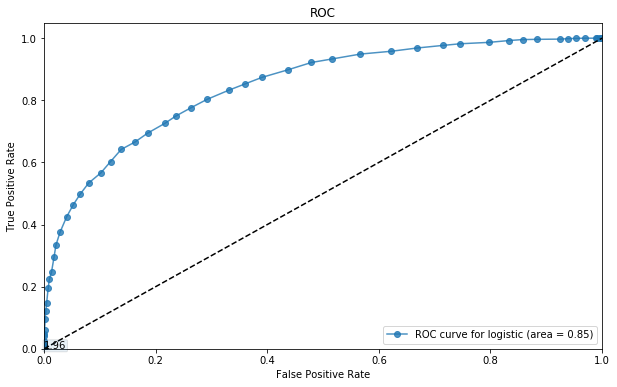

In [23]:
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(10,6))
ax=make_roc("logistic", clf_l, ytest_l, Xtest_l, labe=200, skip=2)

In [46]:
# Import necessary modules
from sklearn.model_selection import cross_val_score

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(clf_l, Xtest_l, ytest_l.ravel(), cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC scores computed using 5-fold cross-validation: [0.87607018 0.83945177 0.83231513 0.84483937 0.84659134]
